In [ ]:
import zipfile
zipfile=zipfile.ZipFile('/content/WhatsApp Chat with Nishant G..zip')
zipfile.extractall('/content')
zipfile.close()

In [ ]:
import zipfile
zipfile=zipfile.ZipFile('/content/WhatsApp Chat with Swaraj.zip')
zipfile.extractall('/content')
zipfile.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import re

# Function to parse each line of the WhatsApp chat
def parse_line(line):
    # WhatsApp pattern for date, time, sender, and message
    pattern = r"(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}\s?[apmAPM]{2}) - ([^:]+): (.*)"
    match = re.match(pattern, line)

    if match:
        date = match.group(1)
        time = match.group(2)
        sender = match.group(3)
        message = match.group(4)
        return date, time, sender, message
    return None

# Path to your WhatsApp text file
txt_file = '/content/WhatsApp Chat with Nishant G..txt'  # Replace with your actual file path

# Initialize an empty list to hold the parsed data
data = []

# Open and read the file line by line
with open(txt_file, 'r', encoding='utf-8') as file:
    for line in file:
        parsed_line = parse_line(line)
        if parsed_line:
            data.append(parsed_line)

# Convert the list into a pandas DataFrame
df_nishant = pd.DataFrame(data, columns=['Date', 'Time', 'Sender', 'Message'])

# Preview the DataFrame
print(df_nishant.head())

# Optionally save the DataFrame to a CSV file
df_nishant.to_csv('whatsapp_chats.csv', index=False)


       Date      Time      Sender                   Message
0  19/09/23  10:14 am  Pushpendar       Mail aaya kya form?
1  19/09/23  10:29 am  Nishant G.              Nahi abb tak
2  19/09/23  10:29 am  Nishant G.                   Tujhe??
3  19/09/23  10:51 am  Pushpendar                       Nhi
4  20/09/23   7:33 pm  Pushpendar  Payment kiya baacha huya


In [ ]:
def parse_line(line):
   pattern = r"(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}\s?[apmAPM]{2}) - ([^:]+): (.*)"
   match=re.match(pattern,line)

   if match:
    date=match.group(1)
    time=match.group(2)
    sender=match.group(3)
    message=match.group(4)
    return date,time,sender,message
   return None



txt_file = '/content/WhatsApp Chat with Swaraj.txt'
data=[]
with open(txt_file,'r',encoding='utf-8') as file:
  for line in file:
    parsed_line=parse_line(line)
    if parsed_line:
      data.append(parsed_line)

df_swaraj=pd.DataFrame(data,columns=['Date','Time','Sender','Message'])

df_swaraj.to_csv('whatsapp_swaraj.csv',index=False)

In [ ]:
df_total=pd.concat([df_nishant,df_swaraj])

In [ ]:
print(f"The total number of rows in df_nishant is {len(df_nishant)}")
print(f"The total number of rows in df_swaraj is {len(df_swaraj)}")
print(f"The total length of dataset is {len(df_total)}")
df_total.head()

The total number of rows in df_nishant is 12081
The total number of rows in df_swaraj is 18408
The total length of dataset is 30489


,Date,Time,Sender,Message
0,19/09/23,10:14 am,Pushpendar,Mail aaya kya form?
1,19/09/23,10:29 am,Nishant G.,Nahi abb tak
2,19/09/23,10:29 am,Nishant G.,Tujhe??
3,19/09/23,10:51 am,Pushpendar,Nhi
4,20/09/23,7:33 pm,Pushpendar,Payment kiya baacha huya


In [ ]:
## if you want to take sender column you can take
# df_total['Sender'] = df_total['Sender'].apply(lambda word: 'other' if word.lower() != 'pushpendar' else word)


In [ ]:
df_total.head()

,Date,Time,Sender,Message
0,19/09/23,10:14 am,Pushpendar,Mail aaya kya form?
1,19/09/23,10:29 am,Nishant G.,Nahi abb tak
2,19/09/23,10:29 am,Nishant G.,Tujhe??
3,19/09/23,10:51 am,Pushpendar,Nhi
4,20/09/23,7:33 pm,Pushpendar,Payment kiya baacha huya


In [ ]:
df_total.drop(columns=['Date','Time','Sender'],inplace=True)

In [ ]:
df_total['Message']=df_total['Message'].str.lower()

In [ ]:
df_total.isnull().sum(),
df_total.duplicated().sum()

8222

In [ ]:
import re

# Function to remove emojis from the sender's name
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


df_total['Message'] = df_total['Message'].apply(remove_emoji)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stop_word(text):
  stop_word=set(stopwords.words('english'))
  words=text.split()
  filter_word=[i for i in words if i.lower() not in stop_word]
  return ' '.join(filter_word)

df_total['Message']=df_total['Message'].apply(remove_stop_word)


In [ ]:
tokinze=Tokenizer()
tokinze.fit_on_texts(df_total['Message'])
sequence=tokinze.texts_to_sequences(df_total['Message'])
vocab_size=len(tokinze.word_index)+1

In [ ]:
length=max([len(seq) for seq in sequence])
input_sequence=np.array(pad_sequences(sequence,maxlen=length,padding='pre'))
x,y=input_sequence[:,:-1],input_sequence[:,-1]

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)


In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,100,input_length=length-1))
model.add(LSTM(150))

model.add(Dense(vocab_size,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# split_index=int(len(text)*0.7)
# x_train,x_test=text[:split_index],text[split_index:]
# y_train,y_test=text[:split_index],text[split_index:]

In [ ]:
# len(x_train),len(x_test),len(y_train),len(y_test)

In [ ]:
history=model.fit(x,y,epochs=10,batch_size=32,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.1833 - loss: 5.5081 - val_accuracy: 0.2089 - val_loss: 5.2997
Epoch 2/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.2125 - loss: 4.9272 - val_accuracy: 0.2447 - val_loss: 5.2681
Epoch 3/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2485 - loss: 4.6500 - val_accuracy: 0.2793 - val_loss: 5.1978
Epoch 4/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2903 - loss: 4.3458 - val_accuracy: 0.3009 - val_loss: 5.1574
Epoch 5/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.3097 - loss: 4.1065 - val_accuracy: 0.3016 - val_loss: 5.2006
Epoch 6/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3321 - loss: 3.8734 - val_accuracy: 0.3045 - val_loss: 5.2691
Epoch 7/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3509 - loss: 3.6563 - val_accuracy: 0.2991 - val_loss: 5.3175
Epoch 8/10
763/763 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.3555 - loss: 3.5078 - 

In [ ]:
test_graph=history.history['accuracy']
train_graph=history.history['val_accuracy']

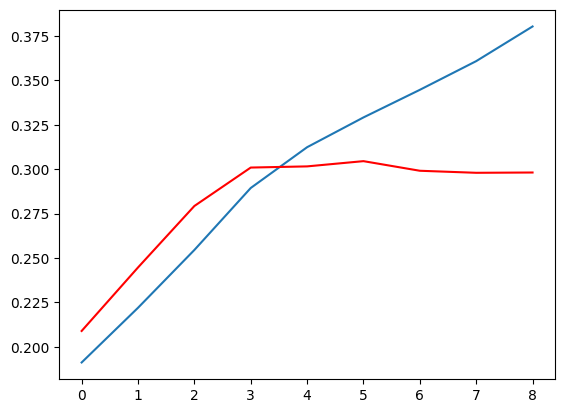

In [ ]:
plt.plot([i for i in range (len(train_graph))] ,test_graph)
plt.plot([i for i in range(len(train_graph))],train_graph,c='red')
plt.show()


In [ ]:

text='kidr hy '
for i in range(10):
  sequence=tokinze.texts_to_sequences([text])
  input_sequence=np.array(pad_sequences(sequence,maxlen=length,padding='pre'))
  prediction=np.argmax(model.predict(input_sequence))
  for word,index in tokinze.word_index.items():
    if index==prediction:
      text+=' '+word
      break
print(text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
kidr hy  na bhata hu na din se dege na din se


In [ ]:
# model_gru=Sequential()
# model_gru.add(Embedding(vocab_size,100,input_length=length-1))
# model_gru.add(tf.keras.layers.GRU(150))
# model_gru.add(Dense(vocab_size,activation='softmax'))
# model_gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])